# Running the CombineScript.py

In [82]:
# Library imports
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data               
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

x = pd.read_csv(os.path.join(train_path,"X_train.txt"), sep='\s+', header=None)
featurel = pd.read_csv(os.path.join("./UCI HAR Dataset","features.txt"), sep='\s+', header=None)
featurelist = list(featurel.loc[:,1])
x.columns = featurelist
yg = pd.read_csv(os.path.join(train_path,"y_train.txt"), sep='\s+', header=None)
xtest = pd.read_csv(os.path.join(test_path,"X_test.txt"), sep='\s+', header=None)
xtest.columns = featurelist
ytest = pd.read_csv(os.path.join(test_path,"y_test.txt"), sep='\s+', header=None)

<>:126: SyntaxWarning: invalid escape sequence '\s'
<>:127: SyntaxWarning: invalid escape sequence '\s'
<>:130: SyntaxWarning: invalid escape sequence '\s'
<>:131: SyntaxWarning: invalid escape sequence '\s'
<>:133: SyntaxWarning: invalid escape sequence '\s'
<>:126: SyntaxWarning: invalid escape sequence '\s'
<>:127: SyntaxWarning: invalid escape sequence '\s'
<>:130: SyntaxWarning: invalid escape sequence '\s'
<>:131: SyntaxWarning: invalid escape sequence '\s'
<>:133: SyntaxWarning: invalid escape sequence '\s'
C:\Users\harsh\AppData\Local\Temp\ipykernel_2924\3110998631.py:126: SyntaxWarning: invalid escape sequence '\s'
  x = pd.read_csv(os.path.join(train_path,"X_train.txt"), sep='\s+', header=None)
C:\Users\harsh\AppData\Local\Temp\ipykernel_2924\3110998631.py:127: SyntaxWarning: invalid escape sequence '\s'
  featurel = pd.read_csv(os.path.join("./UCI HAR Dataset","features.txt"), sep='\s+', header=None)
C:\Users\harsh\AppData\Local\Temp\ipykernel_2924\3110998631.py:130: SyntaxW

Done Combining the training data


C:\Users\harsh\AppData\Local\Temp\ipykernel_2924\3110998631.py:80: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
C:\Users\harsh\AppData\Local\Temp\ipykernel_2924\3110998631.py:81: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
C:\Users\harsh\AppData\Local\Temp\ipykernel_2924\3110998631.py:82: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True

Done Combining the testing data
Done Combining the data


# Running the MakeDataset.py file

In [83]:
# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [84]:
print(X_train[0])
print("---------------")
print(X_test[0])
print("---------------")
print(y_train)
print("---------------")
print(y_test)  

[[ 1.19648   -0.1606898 -0.740178 ]
 [ 1.22203   -0.2672951 -0.7717485]
 [ 1.22311   -0.4338634 -0.7678422]
 ...
 [ 0.4974957 -0.2795907 -0.2029592]
 [ 0.5064167 -0.286091  -0.2564634]
 [ 0.5609918 -0.302237  -0.2553743]]
---------------
[[ 1.293474   -0.3140436  -0.2480047 ]
 [ 1.258798   -0.2909032  -0.5137133 ]
 [ 1.258902   -0.3451832  -0.505633  ]
 ...
 [ 0.6532789  -0.02082443 -0.06393618]
 [ 0.7110597  -0.1404382  -0.00802015]
 [ 0.8174469  -0.2235447  -0.02307176]]
---------------
[2 6 5 2 2 2 1 1 5 4 1 4 1 1 6 2 3 1 1 4 3 3 5 6 5 1 3 6 4 5 5 2 5 1 1 6 4
 3 3 3 3 4 6 3 4 1 2 2 6 5 5 3 6 6 4 3 4 2 4 5 5 5 5 4 6 6 4 5 3 4 3 1 4 4
 3 1 5 2 3 6 1 4 2 2 5 2 1 3 6 6 2 5 6 1 3 5 2 3 4 4 2 5 1 1 1 3 4 5 6 1 3
 6 5 4 2 2 6 2 6 6 3 1 4 6 2 2]
---------------
[3 1 2 5 5 1 1 5 3 2 6 5 6 5 6 1 6 5 2 5 4 3 2 2 1 4 6 4 1 2 6 2 4 4 3 6 6
 3 1 5 3 2 1 4 4 4 5 1 3 3 3 6 2 4]


# Question 1:
Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? **[0.5 marks]**

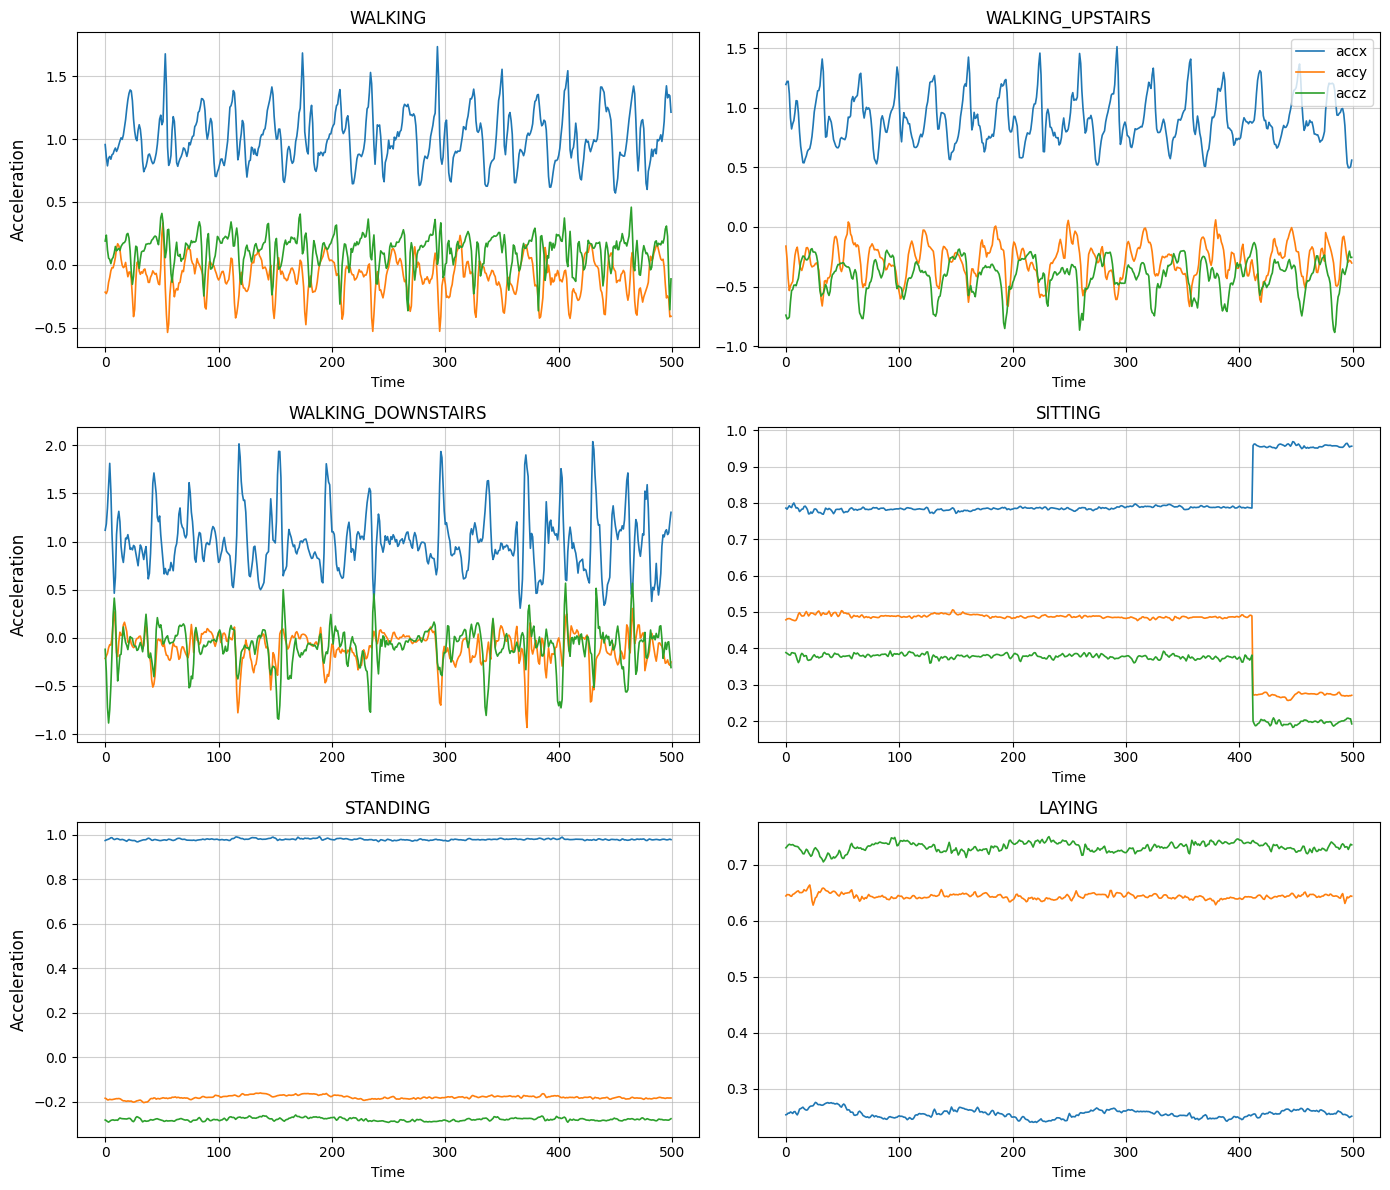

In [85]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(14, 12)) 

for i, (j, activity) in enumerate(ACTIVITIES.items()):
    
    row = i // 2
    col = i % 2
    
    sample_i = np.where(y_train == j)[0][0]
    sample = X_train[sample_i]
    
    axes[row, col].plot(sample[:, 0], label='accx', linewidth=1.2)
    axes[row, col].plot(sample[:, 1], label='accy', linewidth=1.2)
    axes[row, col].plot(sample[:, 2], label='accz', linewidth=1.2)
    
    axes[row, col].set_title(activity)
    axes[row, col].set_xlabel('Time')
    axes[row, col].grid(alpha=0.6)
    
    if col == 0:
        axes[row, col].set_ylabel('Acceleration', fontsize=12)
    if i == 1:
        axes[row, col].legend(loc='upper right', fontsize=10)
        
plt.tight_layout()
plt.show()

Yes, we are able to differentiate between activities. We can very clearly draw distinctions between dynamic activities like Walking and static activites like Standing/Laying etc. The dynamic activites have a very frantic accelaration changes while the static activities have a flat accelaration graph. It is a bit hard to distinguish the activites within the dynamic activites itself as all the three walking activites have very simillar graphs. Within the statics activities themselves, the standing activity can be figured out because it has the most static graph of all. The sitting action can also be distinguished due to its characteristic change in graph.
Yes, I think the model should be able to distinguish between the activities. The distinction between dynamic and static activities is very clear in the waveforms.
Even though the three walking activities are similar, their patterns are not identical. Static activities, especially LAYING, are easily separable due to its flat graph.

# Question 2
Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration $(acc_x^2+acc_y^2+acc_z^2)$ for each activity and justify your answer. **[0.5 marks]**

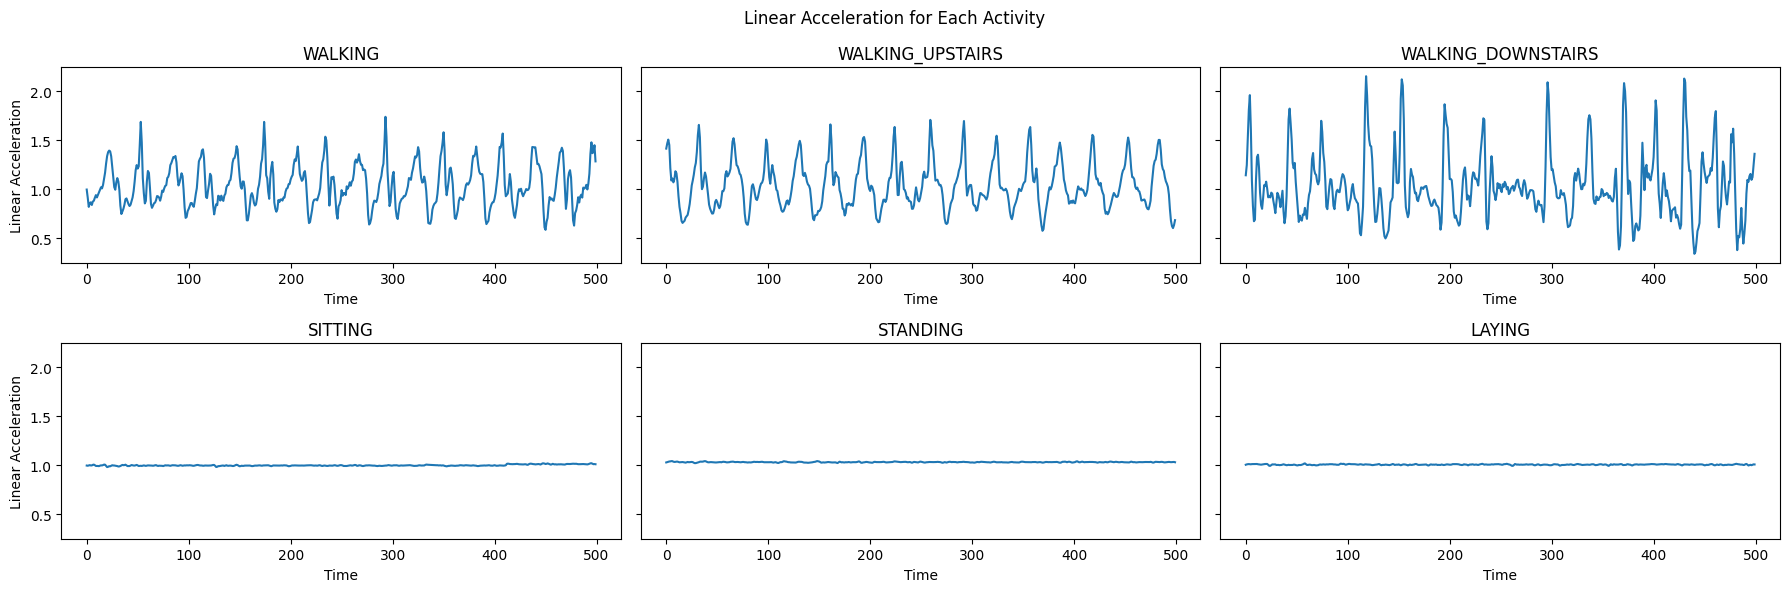

In [86]:
fig, axes = plt.subplots(2, 3, figsize=(18, 6), sharey=True)
for idx, (class_num, activity) in enumerate(ACTIVITIES.items()):
    
    row = idx // 3
    col = idx % 3
    sample_i = np.where(y_train == class_num)[0][0]
    
    
    sample = X_train[sample_i]
    lin_acc = np.sqrt(sample[:, 0]**2 + sample[:, 1]**2 + sample[:, 2]**2)
    
    axes[row, col].plot(lin_acc)
    axes[row, col].set_title(activity)
    axes[row, col].set_xlabel('Time')
    
    if col == 0:
        axes[row, col].set_ylabel('Linear Acceleration')
plt.suptitle('Linear Acceleration for Each Activity')
plt.tight_layout()
plt.show()

Looking at the plots, no it's not needed to make a machine learning model to distinguish between static and dynamic activities. Static activities will show you next to zero fluctuation in the accelaration plot while the dynamic activities will have a lot of fluctuations and changes. 

# Question 3
3. Visualize the data using PCA. **[1 marks]**
    * Use PCA (Principal Component Analysis) on Total Acceleration $(acc_x^2+acc_y^2+acc_z^2)$ to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities. 
    *  Next, use [TSFEL](https://tsfel.readthedocs.io/en/latest/) ([a featurizer library](https://github.com/fraunhoferportugal/tsfel)) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities. 
    *  Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
    *  Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data? 

## 1)


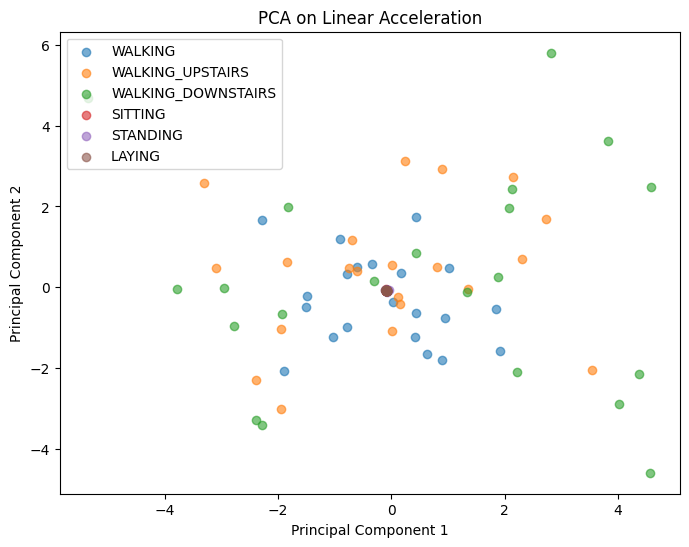

In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

acc_magnitude = np.sqrt(np.sum(X_train**2, axis=2))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(acc_magnitude)

plt.figure(figsize=(8,6))
for label, activity in ACTIVITIES.items():
    idx = np.where(y_train == label)
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=activity, alpha=0.6)
    

plt.legend()
plt.title("PCA on Linear Acceleration")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## 2)

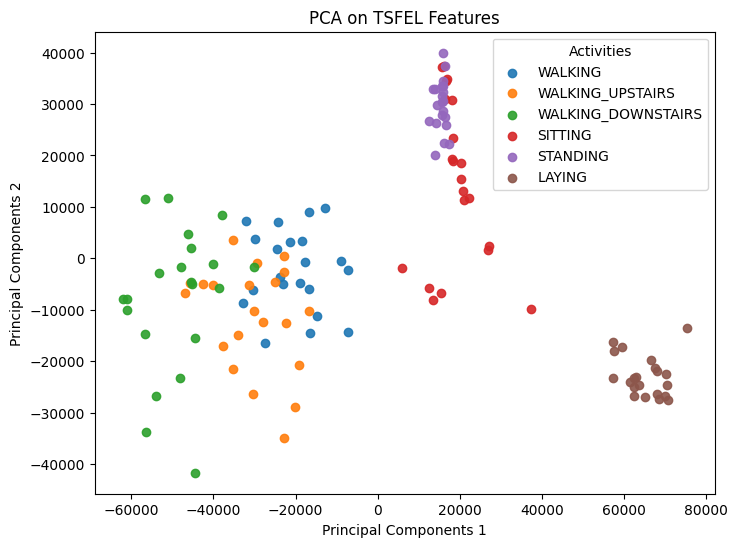

In [88]:
import tsfel


cfg = tsfel.get_features_by_domain()
features = tsfel.time_series_features_extractor(cfg, X_train, fs=50)

# Clean data
features = features.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

# PCA
pca = PCA(n_components=2)
X_pca_tsfel = pca.fit_transform(features)


plt.figure(figsize=(8,6))

for label, activity in ACTIVITIES.items():
    mask = (y_train == label)
    plt.scatter(X_pca_tsfel[mask,0], X_pca_tsfel[mask,1], label=activity, alpha=0.9)

plt.title("PCA on TSFEL Features")
plt.xlabel("Principal Components 1")
plt.ylabel("Principal Components 2")
plt.legend(title="Activities")

plt.show()

## 3)

(7352, 561) ->  (7352, 2) by PCA


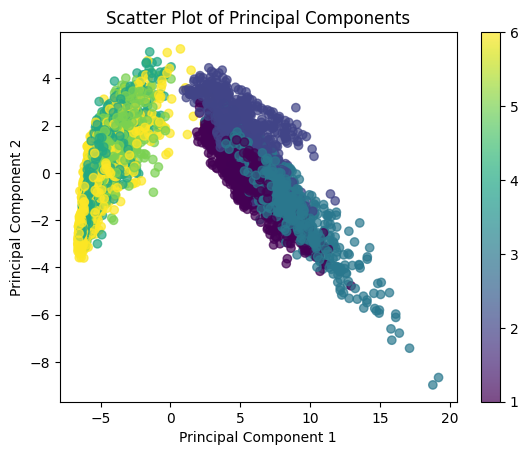

Classes: [(1, 'WALKING'), (2, 'WALKING_UPSTAIRS'), (3, 'WALKING_DOWNSTAIRS'), (4, 'SITTING'), (5, 'STANDING'), (6, 'LAYING')]


In [ ]:
# Applying PCA on raw data from provided dataset obtained from 561 feature vector's data.
xpcaraw = pca.fit_transform(x)
scatteraw = plt.scatter(xpcaraw[:, 0],xpcaraw[:, 1],c=yg, cmap='viridis', alpha=0.7)
print(x.shape, "-> ", xpcaraw.shape, "by PCA")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.colorbar(scatteraw)
plt.show()
print("Classes:",list(ACTIVITIES.items()))

## 4)

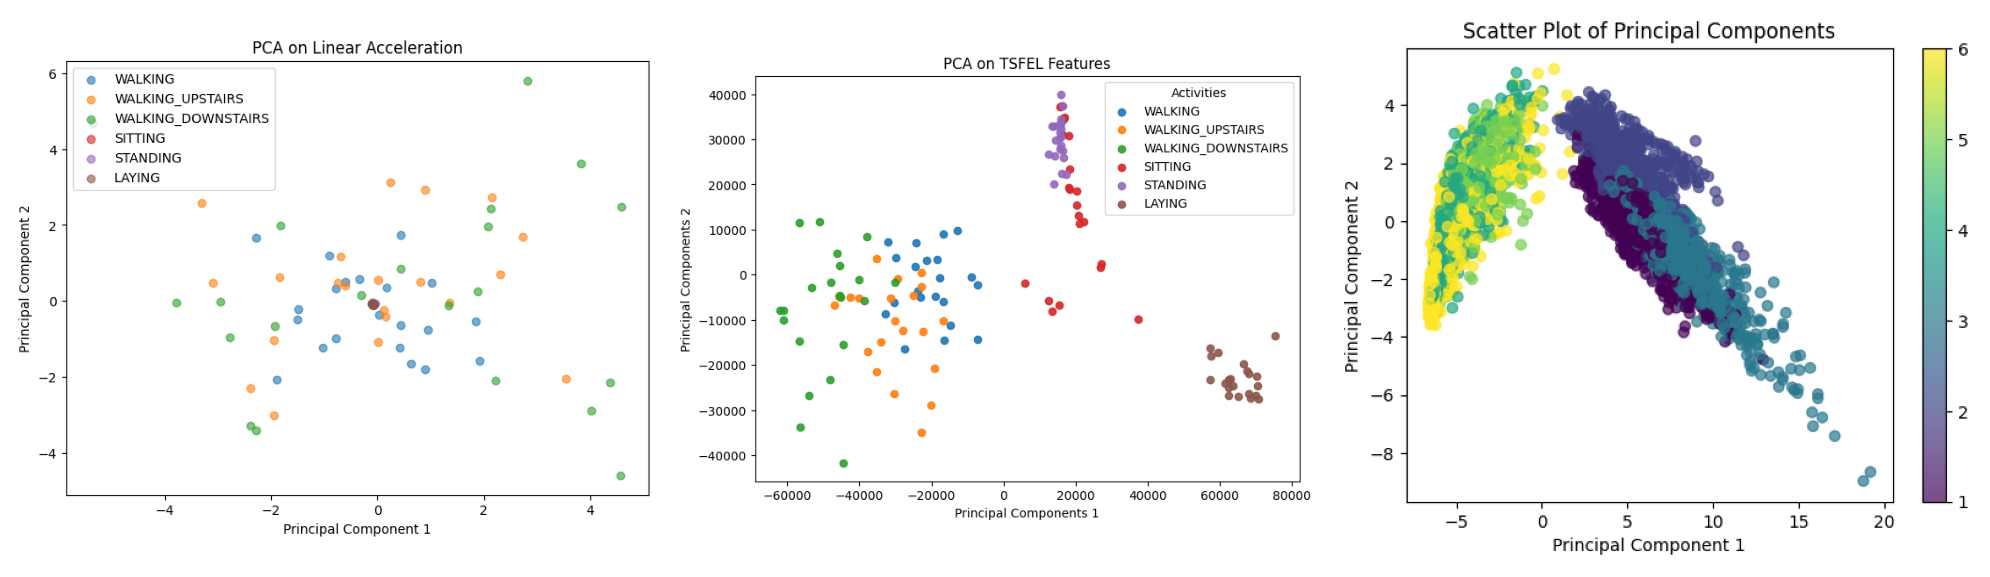

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes = axes.flatten()

plt.subplot(1, 3, 1)
img1 = plt.imread('./Images/PCA_Linear_Acceleration.png')
plt.imshow(img1)
plt.axis('off')

plt.subplot(1, 3, 2)
img2 = plt.imread('./Images/PCA_TSFEL_Data.png')
plt.imshow(img2)
plt.axis('off')

plt.subplot(1, 3, 3)
img3 = plt.imread('./Images/PCA_UCI_Data.png')
plt.imshow(img3)
plt.axis('off')

plt.tight_layout(h_pad=0.25)
plt.show()

PCA on Total Acceleration shows static activities clustered near the origin with dynamic ones more dispersed, overall separation being only between static and dynamic. Using TSFEL features improves separation of static activities, though dynamic activities still overlap. PCA on the original dataset features distinguishes static from dynamic activities but shows considerable overlap within dynamic classes. Overall, TSFEL and dataset features provide better visualization than total acceleration alone, but clear separation of dynamic activities remains challenging.

# Question 4

In [91]:
# Correlation Matrix - TSFEL features
corr_tsfel = features.corr()

threshold = 0.9
high_corr_tsfel = np.where(np.abs(corr_tsfel) > threshold)
high_corr_pairs_tsfel = [(features.columns[i], features.columns[j], corr_tsfel.iloc[i, j]) for i, j in zip(*high_corr_tsfel) if i < j]

df_corr_tsfel = pd.DataFrame(high_corr_pairs_tsfel, columns=["Feature 1", "Feature 2", "Correlation"])

print("\n----------------------- TSFEL Feature Correlation Matrix -----------------------")
print(corr_tsfel.head())  
print("\nHighly correlated TSFEL features (|corr| > 0.9):")
print(df_corr_tsfel)


----------------------- TSFEL Feature Correlation Matrix -----------------------
                        0_Absolute energy  0_Area under the curve  \
0_Absolute energy                1.000000                0.983795   
0_Area under the curve           0.983795                1.000000   
0_Autocorrelation               -0.264541               -0.209707   
0_Average power                  1.000000                0.983795   
0_Centroid                       0.164905                0.188140   

                        0_Autocorrelation  0_Average power  0_Centroid  \
0_Absolute energy               -0.264541         1.000000    0.164905   
0_Area under the curve          -0.209707         0.983795    0.188140   
0_Autocorrelation                1.000000        -0.264541   -0.250115   
0_Average power                 -0.264541         1.000000    0.164905   
0_Centroid                      -0.250115         0.164905    1.000000   

                        0_ECDF Percentile Count_0  0_ECDF 

In [92]:
# Correlation Matrix - Raw Dataset (561 features)
corr_dataset = x.corr()

high_corr_dataset = np.where(np.abs(corr_dataset) > threshold)
high_corr_pairs_dataset = [(x.columns[i], x.columns[j], corr_dataset.iloc[i, j]) for i, j in zip(*high_corr_dataset) if i < j]

df_corr_dataset = pd.DataFrame(high_corr_pairs_dataset, columns=["Feature 1", "Feature 2", "Correlation"])

print("\n----------------------- Raw Dataset Feature Correlation Matrix -----------------------")
print(corr_dataset.head())   
print("\nHighly correlated Raw Dataset features (|corr| > 0.9):")
print(df_corr_dataset)


----------------------- Raw Dataset Feature Correlation Matrix -----------------------
                   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
tBodyAcc-mean()-X           1.000000           0.148061          -0.256952   
tBodyAcc-mean()-Y           0.148061           1.000000          -0.078769   
tBodyAcc-mean()-Z          -0.256952          -0.078769           1.000000   
tBodyAcc-std()-X            0.000619          -0.045160          -0.020217   
tBodyAcc-std()-Y           -0.021903          -0.044920          -0.016641   

                   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
tBodyAcc-mean()-X          0.000619         -0.021903         -0.044617   
tBodyAcc-mean()-Y         -0.045160         -0.044920         -0.049746   
tBodyAcc-mean()-Z         -0.020217         -0.016641         -0.008410   
tBodyAcc-std()-X           1.000000          0.927461          0.851668   
tBodyAcc-std()-Y           0.927461          1.000000          0.895

In [93]:

def find_redundant_features(corr_matrix, feature_names, threshold=0.9):
    high_corr = np.where(np.abs(corr_matrix) > threshold)
    pairs = [(feature_names[i], feature_names[j], corr_matrix.iloc[i,j]) 
             for i, j in zip(*high_corr) if i < j]
    return pd.DataFrame(pairs, columns=["Feature 1", "Feature 2", "Correlation"])


# TSFEL Redundant Features
df_corr_tsfel = find_redundant_features(corr_tsfel, features.columns, threshold=0.9)
print("\nHighly correlated TSFEL features (|corr| > 0.9):")
print(df_corr_tsfel.head(20))
print(f"Total redundant TSFEL pairs: {len(df_corr_tsfel)}")



Highly correlated TSFEL features (|corr| > 0.9):
                 Feature 1                       Feature 2  Correlation
0        0_Absolute energy          0_Area under the curve     0.983795
1        0_Absolute energy                 0_Average power     1.000000
2        0_Absolute energy             0_ECDF Percentile_1     0.972869
3        0_Absolute energy                0_Histogram mode     0.907235
4        0_Absolute energy                          0_Mean     0.975014
5        0_Absolute energy                        0_Median     0.955005
6        0_Absolute energy              0_Root mean square     0.989851
7        0_Absolute energy  0_Wavelet absolute mean_1.39Hz     0.971419
8        0_Absolute energy  0_Wavelet absolute mean_1.56Hz     0.966946
9        0_Absolute energy  0_Wavelet absolute mean_1.79Hz     0.960869
10       0_Absolute energy  0_Wavelet absolute mean_12.5Hz     0.911321
11       0_Absolute energy  0_Wavelet absolute mean_2.08Hz     0.953114
12       0_Abs

In [94]:
# Raw Dataset Redundant Features

df_corr_dataset = find_redundant_features(corr_dataset, x.columns, threshold=0.9)
print("\nHighly correlated Raw Dataset features (|corr| > 0.9):")
print(df_corr_dataset.head(20))
print(f"Total redundant Raw Dataset pairs: {len(df_corr_dataset)}")


Highly correlated Raw Dataset features (|corr| > 0.9):
           Feature 1                 Feature 2  Correlation
0   tBodyAcc-std()-X          tBodyAcc-std()-Y     0.927461
1   tBodyAcc-std()-X          tBodyAcc-mad()-X     0.998632
2   tBodyAcc-std()-X          tBodyAcc-mad()-Y     0.920888
3   tBodyAcc-std()-X          tBodyAcc-max()-X     0.980844
4   tBodyAcc-std()-X          tBodyAcc-min()-X    -0.966500
5   tBodyAcc-std()-X          tBodyAcc-min()-Y    -0.904539
6   tBodyAcc-std()-X            tBodyAcc-sma()     0.973155
7   tBodyAcc-std()-X       tBodyAcc-energy()-X     0.948324
8   tBodyAcc-std()-X          tBodyAcc-iqr()-X     0.981220
9   tBodyAcc-std()-X      tBodyAccJerk-std()-X     0.973589
10  tBodyAcc-std()-X      tBodyAccJerk-std()-Y     0.923488
11  tBodyAcc-std()-X      tBodyAccJerk-mad()-X     0.974909
12  tBodyAcc-std()-X      tBodyAccJerk-mad()-Y     0.924708
13  tBodyAcc-std()-X      tBodyAccJerk-max()-X     0.939112
14  tBodyAcc-std()-X      tBodyAccJerk-min()